<a href="https://www.kaggle.com/code/kolekardhanu/indian-airlines-ticket-price-prediction?scriptVersionId=137064766" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Group Number:4 Task Assigned
## 1. Dhanashri Kolekar PRN:230340128010
## 2. Sohan G. Gaikwad  PRN:230340128011
## 3. Parth Sevak       PRN:230340128017
## 4. Rushikesh Kumbhakarn  PRN:230340128021
## 5. Samruddhi Ubhe      PRN:230340128028

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-airlines-ticket-price-analysis/business.csv
/kaggle/input/indian-airlines-ticket-price-analysis/Indian Airlines.csv
/kaggle/input/indian-airlines-ticket-price-analysis/economy.csv


![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F14567266%2F14d5a5a98f40ce019f45c7db63a5ff89%2Fplane.jpg?generation=1689592093519303&alt=media)


## Indian Airlines Ticket Price Prediction
https://www.kaggle.com/datasets/dhirajbembade/indian-airlines-ticket-price-analysis

### INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.


# FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

## Importing libraries

In [2]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as tm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading The dataset

In [3]:
#reading the dataset file using pandas
Data = pd.read_csv('/kaggle/input/indian-airlines-ticket-price-analysis/Indian Airlines.csv',index_col=0)

## About the Dataset

In [4]:
# give 1st 5 row command name attribute and variables

Data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
Data.tail()
# give last 5 rows of the dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:

Data.shape
#shows number of rows and columns in the dataset

(300153, 11)

In [7]:
Data.describe()
# Generate descriptive statistics

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
Data.info()
#information about dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


## Dealing with missing data

In [9]:
# Checking and counting for missing data points for each column
Data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Inference - data do not contain any Null Values

In [10]:
Data['source_city'].value_counts() 
 # returns object containing counts of unique values

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [11]:
Data['airline'].value_counts() 
 # returns object containing counts of unique values

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [12]:
Data['departure_time'].value_counts() 
 # returns object containing counts of unique values

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [13]:
Data['destination_city'].value_counts() 
 # returns object containing counts of unique values

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [14]:
Data['duration'].value_counts() 
 # returns object containing counts of unique values

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

In [15]:
Data.columns
#find columns name air quality is working as data frame

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Data Preprocessing


In [16]:
Data.dtypes
#datatype of each attribute

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

## Data Visualization

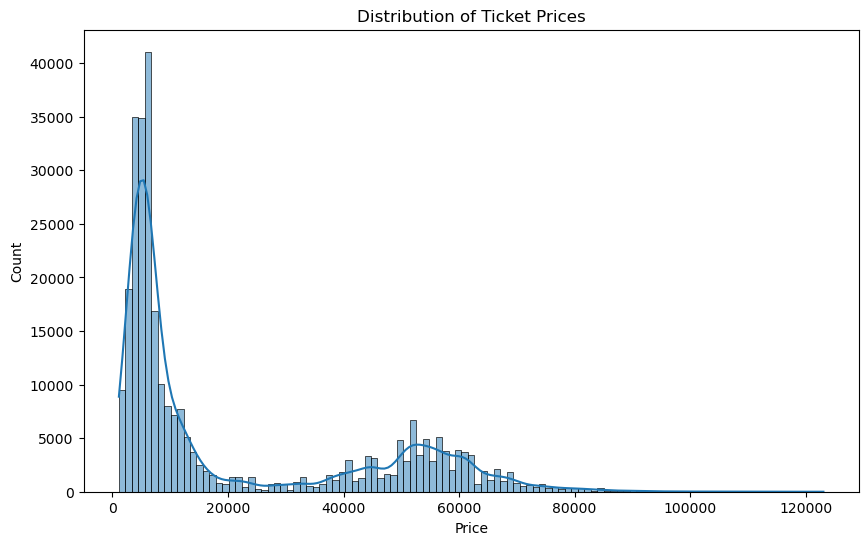

In [17]:
#Histogram representing distribution of ticket prices
plt.figure(figsize=(10, 6))
sns.histplot(data=Data, x='price', kde=True)
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

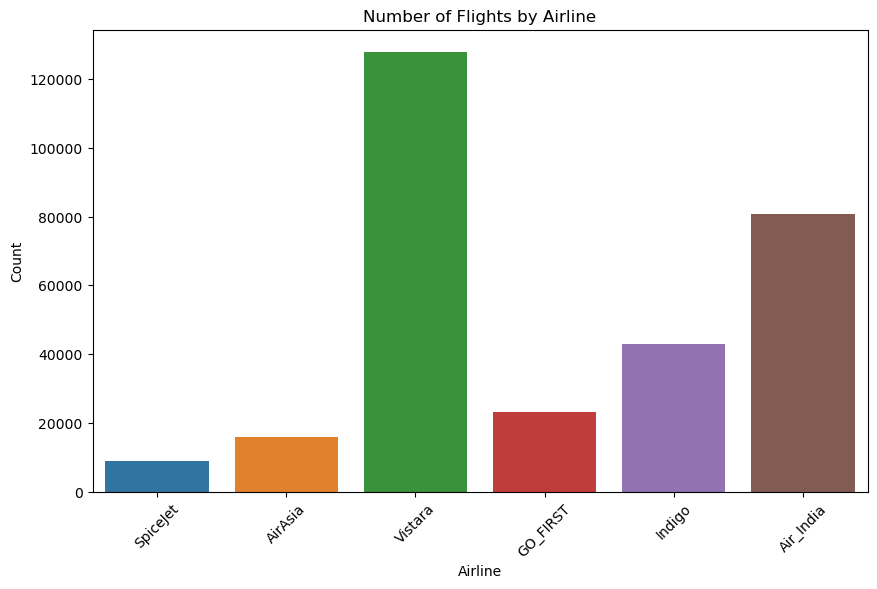

In [18]:
#Bar chart of number of flights by airlines
plt.figure(figsize=(10, 6))
sns.countplot(data=Data, x='airline')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '')

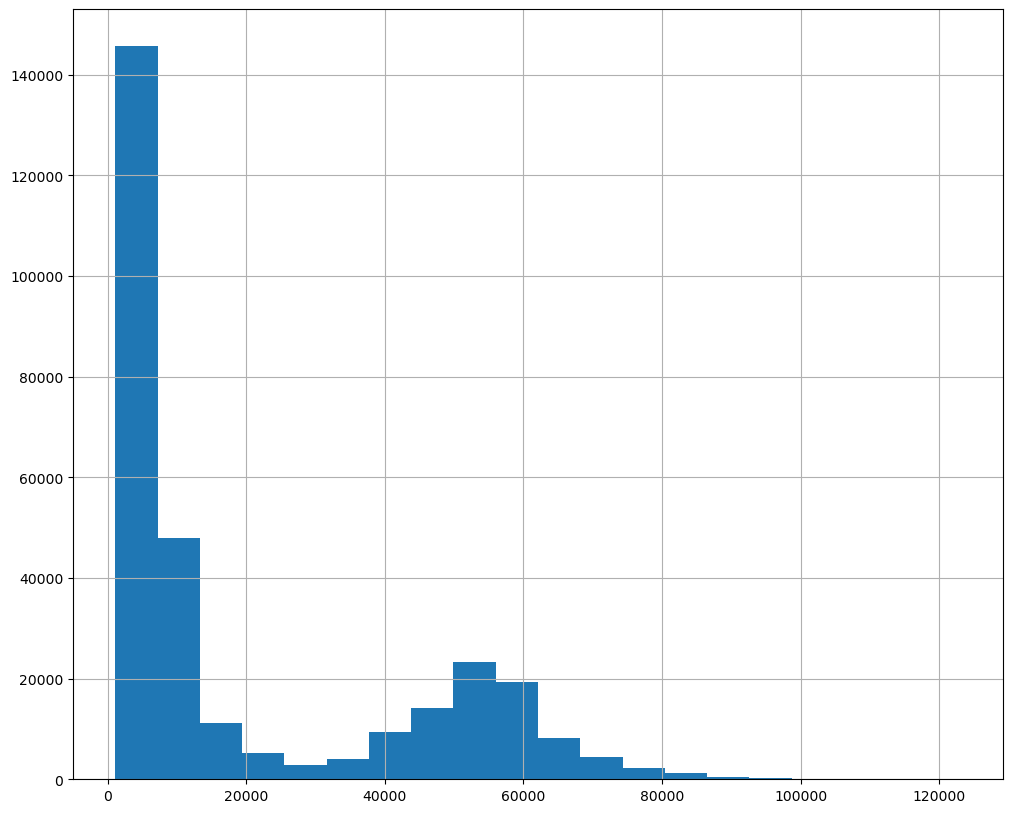

In [19]:
#Prices distribution
plt.figure(figsize=(12,10))
Data['price'].hist(bins=20)
plt.title('')

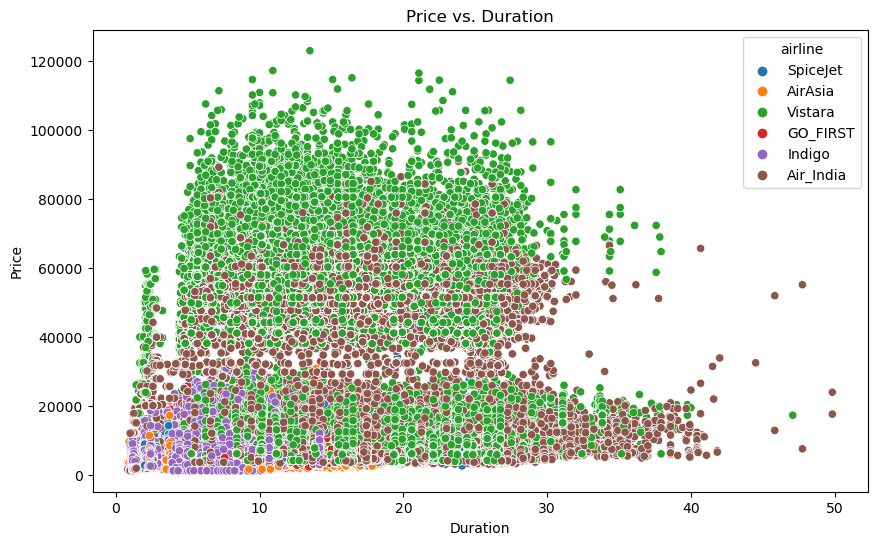

In [20]:
# Scatter plot of price versus duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Data, x='duration', y='price', hue='airline')
plt.title('Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

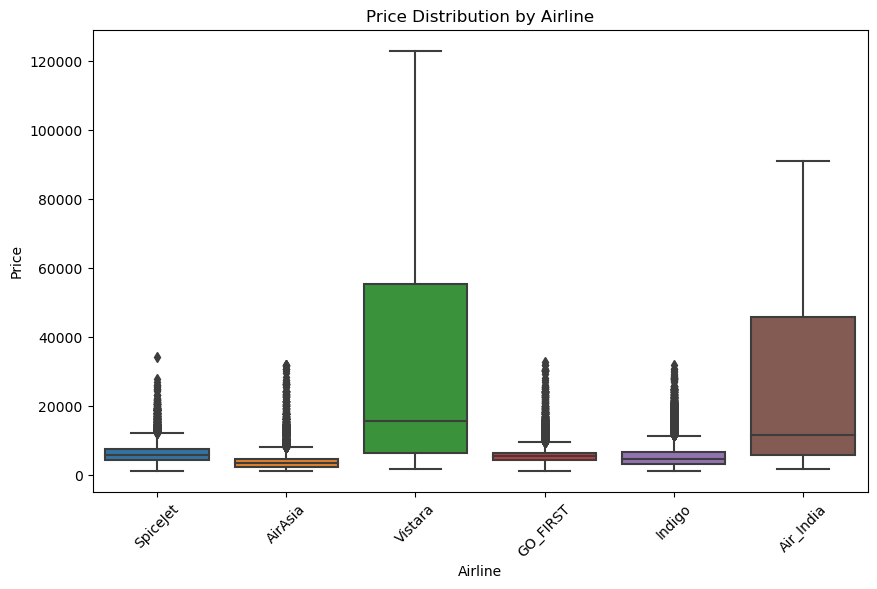

In [21]:
#Box plot of price by airline
plt.figure(figsize=(10, 6))
sns.boxplot(data=Data, x='airline', y='price')
plt.title('Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [22]:
#FUNCTION FOR PLOTTING - 
def price_and(x):
    z = Data.groupby(x)['price'].sum().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data = z, x= x,y='price')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

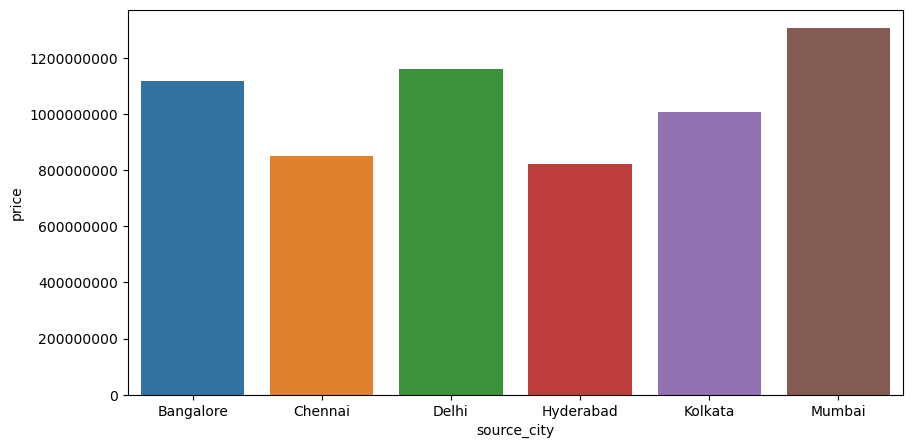

In [23]:
price_and('source_city')

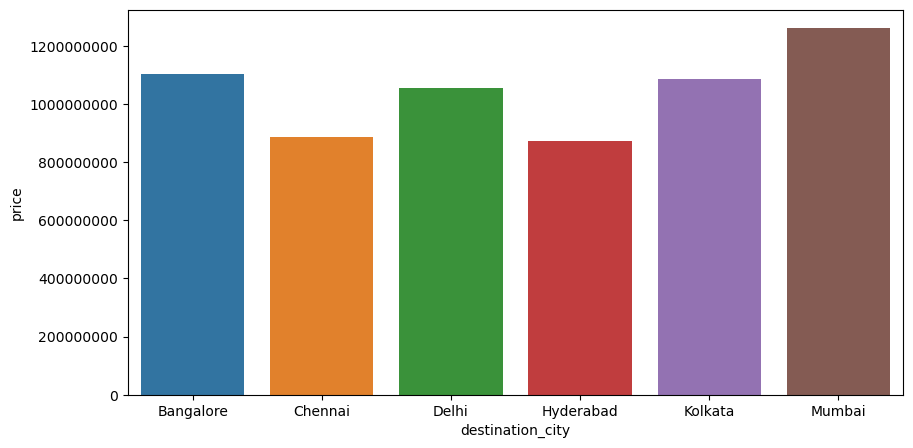

In [24]:
price_and('destination_city')

Departure city counts from more to less:
 Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64


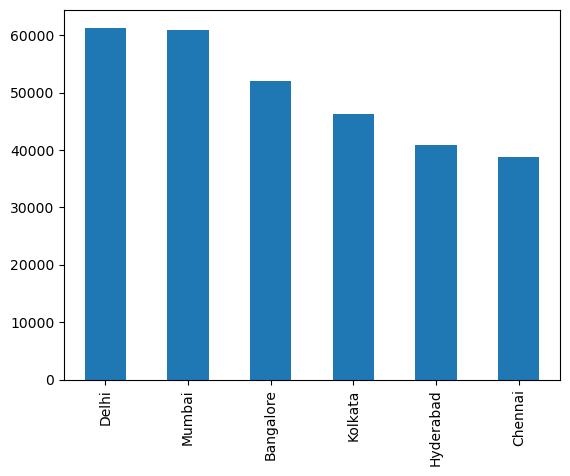

In [25]:

# Count the occurrences of source cities
source_city_counts = Data['source_city'].value_counts()
print("Departure city counts from more to less:\n", source_city_counts)
source_city_counts.plot(kind='bar');

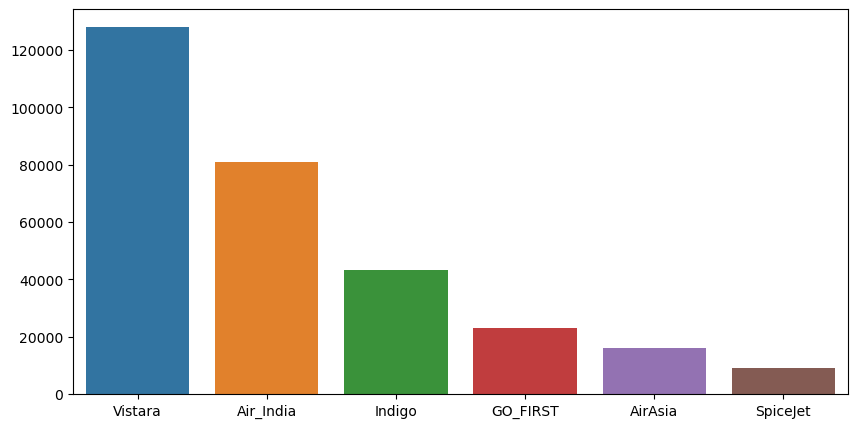

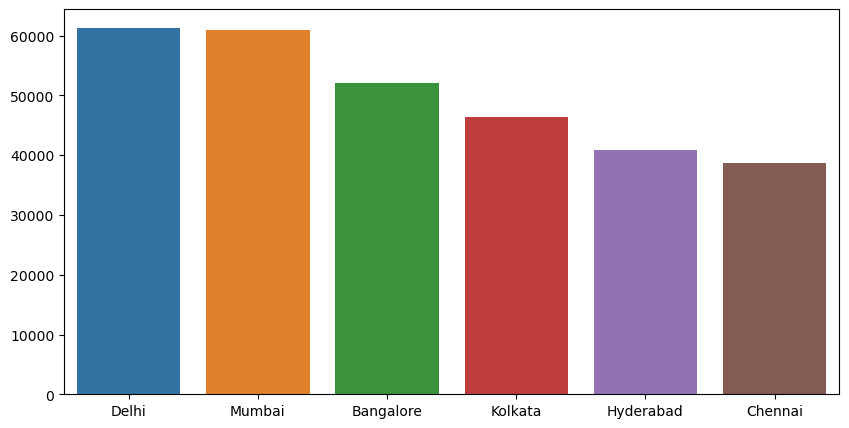

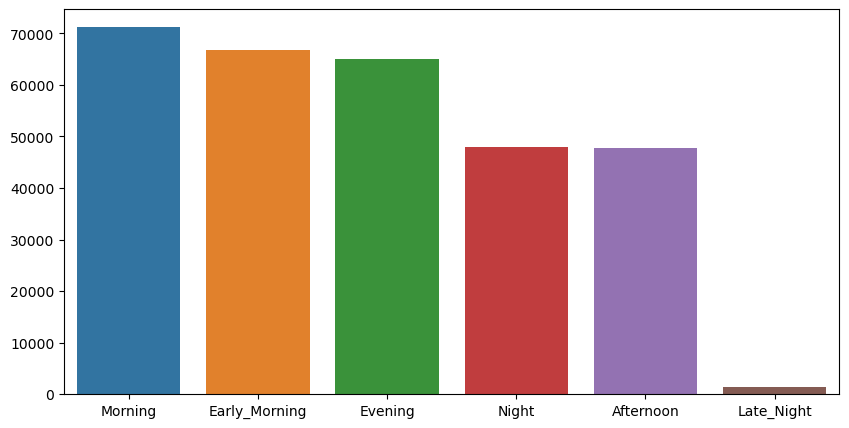

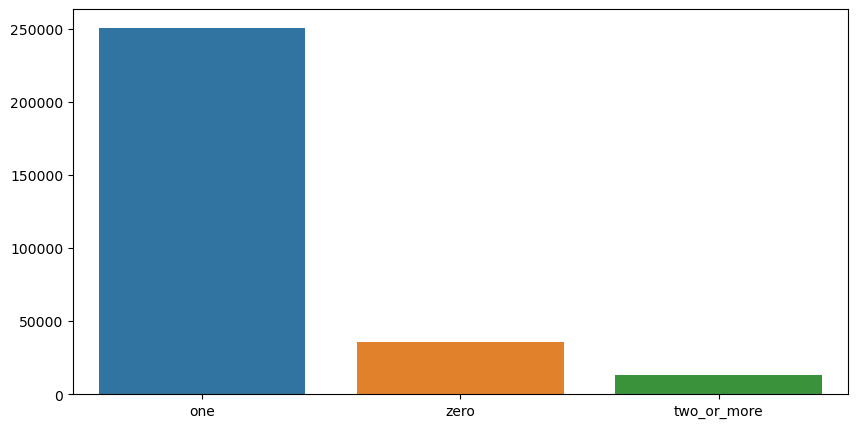

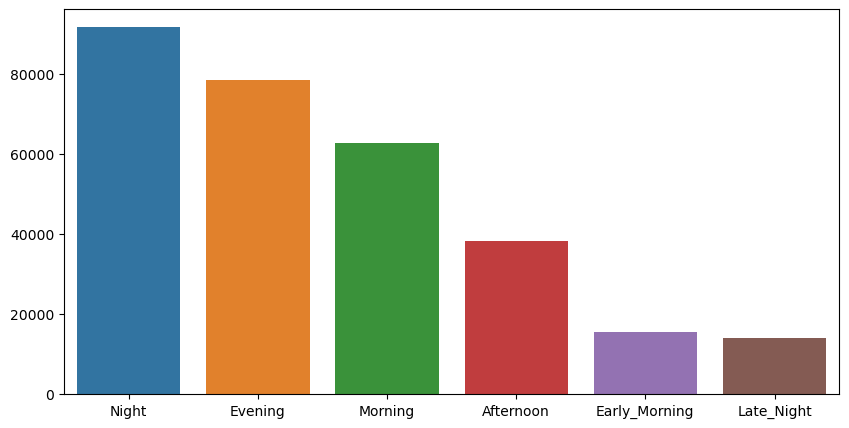

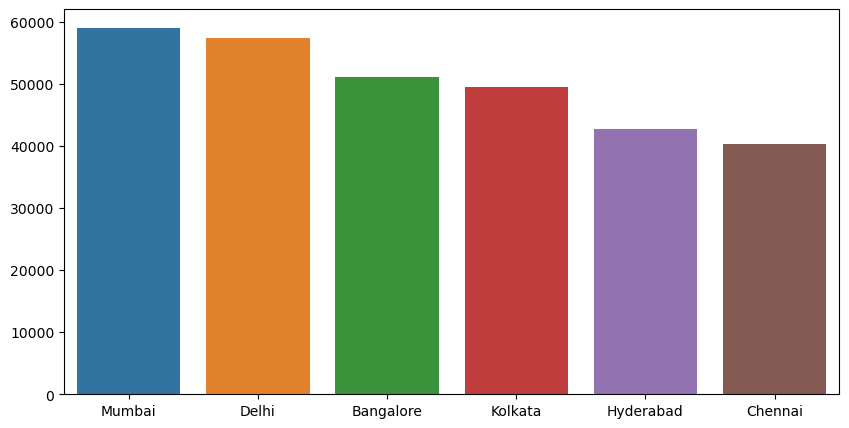

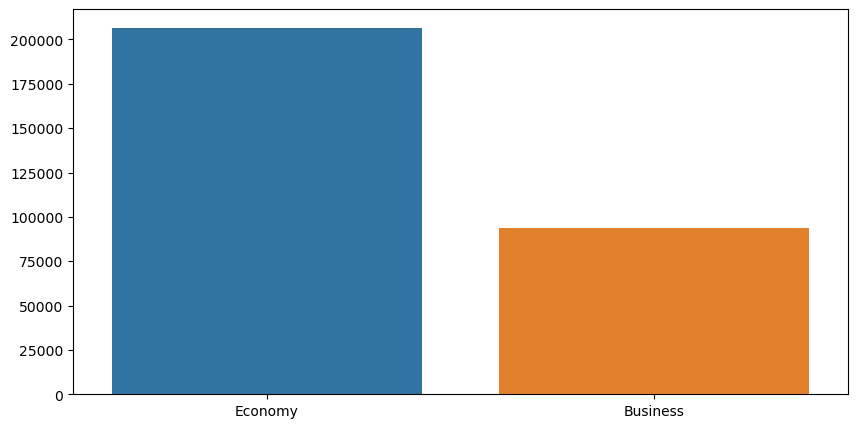

In [26]:
cat = ['airline','source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class']

#VISUALIZING THE VALUE COUNTS
for i in cat:
    count_data = Data[i].value_counts()
    plt.figure(figsize=(10, 5))
    sns.barplot(x=count_data.index, y=count_data.values)
    plt.show()

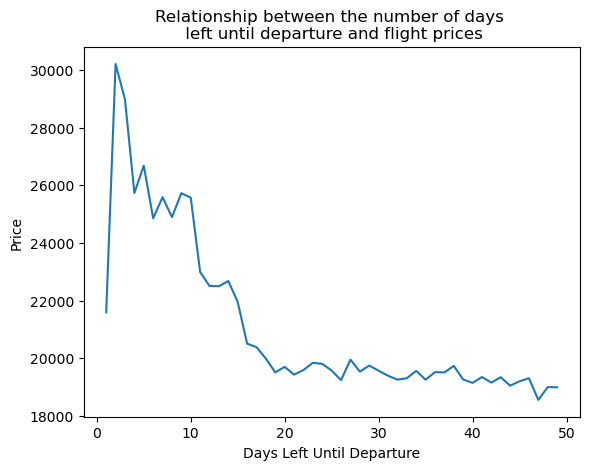

In [27]:
# Create a plot of days_left vs. price
Data.groupby('days_left')['price'].mean().plot()
plt.xlabel('Days Left Until Departure')
plt.ylabel('Price')
plt.title('Relationship between the number of days \n left until departure and flight prices')
plt.show()

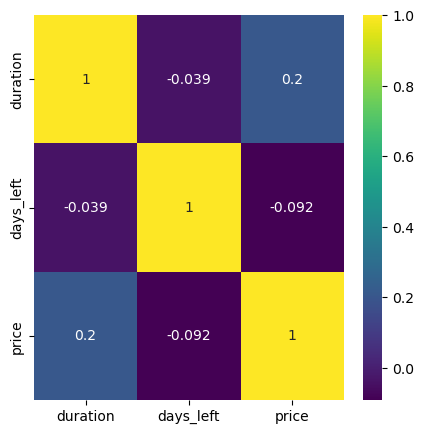

In [28]:
corrmat=Data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(5,5))
# to plot heat map
g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')

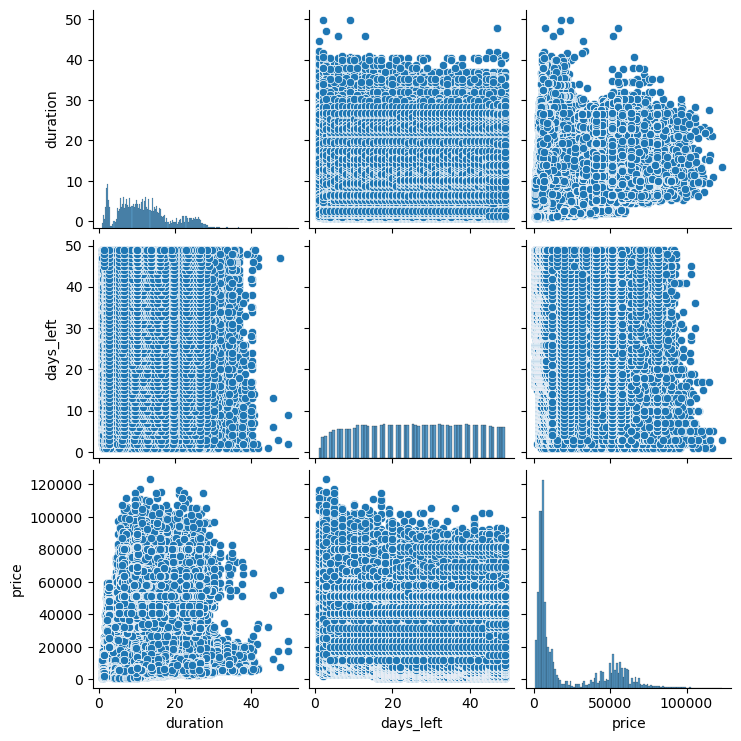

In [29]:
sns.pairplot(Data);

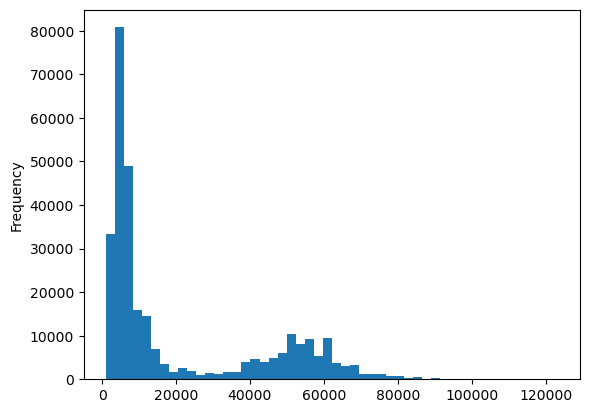

In [30]:
Data["price"].plot.hist(bins=50);

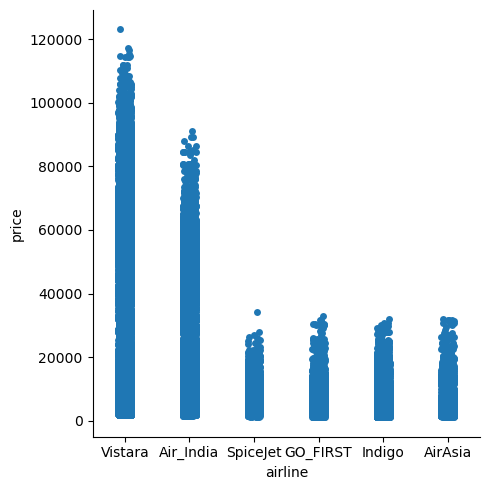

In [31]:
sns.catplot(y='price', x='airline', data=Data.sort_values('price', ascending=False, kind='quick'))
plt.show()

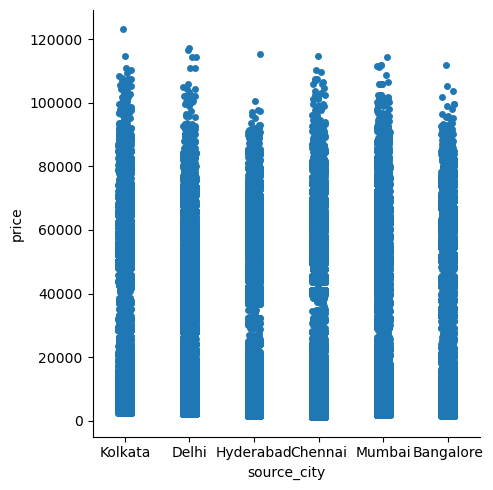

In [32]:
sns.catplot(y='price', x='source_city', data=Data.sort_values('price', ascending=False, kind='quick'))
plt.show()

## Data Analysis

In [33]:
# Calculate the average flight duration by class
duration_by_class = Data.groupby('class')['duration'].mean()
print("Average Flight Duration by Class:\n", duration_by_class)

Average Flight Duration by Class:
 class
Business    13.704274
Economy     11.550060
Name: duration, dtype: float64


In [34]:
# Calculate the average price by number of stops
price_by_stops = Data.groupby('stops')['price'].mean()
print("Change in average prices as per the number of stops:\n", price_by_stops)

Change in average prices as per the number of stops:
 stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64


In [35]:
Data.groupby(['class','airline'])['price'].max()

class     airline  
Business  Air_India     90970
          Vistara      123071
Economy   AirAsia       31917
          Air_India     42349
          GO_FIRST      32803
          Indigo        31952
          SpiceJet      34158
          Vistara       37646
Name: price, dtype: int64

In [36]:
Data.duration.max()

49.83

##  Handling the Categorical data

1. Nominal Data: Data are not in any order. OneHotEncoder is used.
2. Ordinal Data: Data is in order. LabelEncoder is used in this case

In [37]:
Data['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [38]:
cat = ['airline','source_city','departure_time','arrival_time','destination_city','class']
feat = ['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']
target = ['price']

In [39]:
import numpy as np
mapping = {'one': 1, 'zero': 0, 'two_or_more': 2}
replace_func = np.vectorize(lambda x: mapping.get(x, -1))

Data['stops'] = replace_func(Data['stops'])
Data['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [40]:
le = preprocessing.LabelEncoder()

for i in cat:
    Data[i] = le.fit_transform(Data[i])

In [41]:

#FEATURE SELECTION
Data = Data.drop('flight', axis=1)

##  Import necessary libraries

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree

## Feature Selection

In [43]:
X = Data[feat] #feature selection
y = Data['price']        #target column

## Split the dataset into Training and Testing

In [44]:

# Split training set into training and validation sets (60/40 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Split at 60/20/20

In [45]:
X_train.shape , X_test.shape

((240122, 9), (60031, 9))

In [46]:
y_train.shape, y_test.shape

((240122,), (60031,))

## Model Building Using Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 150 ,max_depth = 30, min_samples_leaf = 5, min_samples_split = 30)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=5, min_samples_split=30,
                      n_estimators=150)

In [48]:
y_pred = rf.predict(X_test) 

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [50]:
print(r2_score(y_pred,y_test))

0.9850597909659291


In [51]:
print(mean_absolute_error(y_pred,y_test))

1272.1795612485914


# Conclusion

**Since out of all models, Random forest worked best, we shall finalize it.
Next lets create a function that can make a single prediction**
